In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import healpy as hp

from rubin_scheduler.scheduler.utils import generate_all_sky
from rubin_scheduler.scheduler.model_observatory import tma_movement, KinemModel
from rubin_scheduler.utils import SURVEY_START_MJD, _angular_separation, _approx_ra_dec2_alt_az, Site

In [2]:
nside = 32
mjd = SURVEY_START_MJD
sky = generate_all_sky(nside=nside)

site = Site('LSST')
alt, az = _approx_ra_dec2_alt_az(
            np.radians(sky['ra']), np.radians(sky['dec']), np.radians(site.latitude), np.radians(site.longitude), mjd, return_pa=False
        )

In [3]:
starting_alt_rad=np.radians(75)
starting_az_rad=np.radians(75)

dists = _angular_separation(alt, az, starting_alt_rad, starting_az_rad)

Text(0, 0.5, 'Slew time (seconds)')

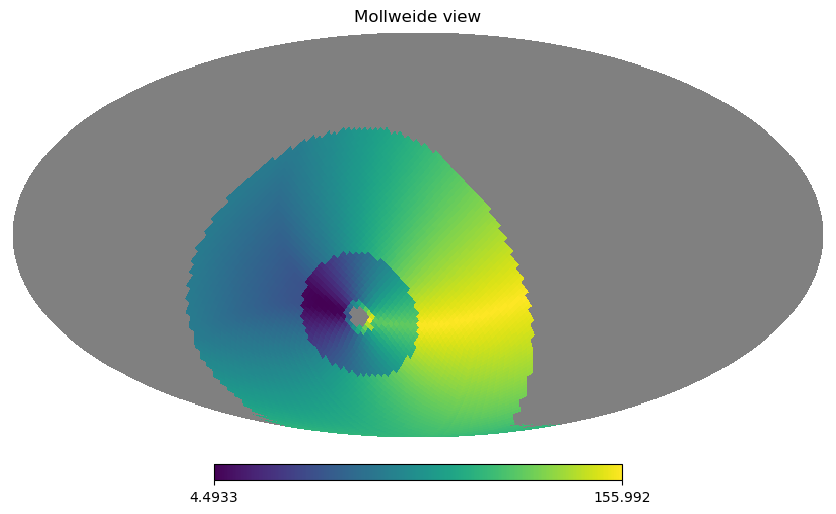

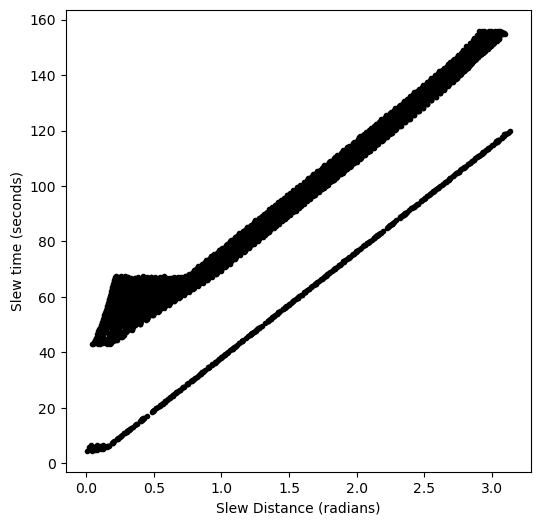

In [4]:
kinematic_model = KinemModel(mjd0=mjd)
tma = tma_movement(70)
kinematic_model.setup_telescope(**tma)
slewtimes = kinematic_model.slew_times(np.radians(sky['ra']), np.radians(sky['dec']), mjd=SURVEY_START_MJD,
                                      starting_alt_rad=starting_alt_rad, starting_az_rad=starting_az_rad)
nominal = slewtimes

hp.mollview(slewtimes, rot=(120, 0, 0))

plt.figure(figsize=(6,6))
plt.plot(dists, slewtimes, 'k.')
plt.xlabel("Slew Distance (radians)")
plt.ylabel("Slew time (seconds)")

Text(0, 0.5, 'Slew time (seconds) - 70% performance')

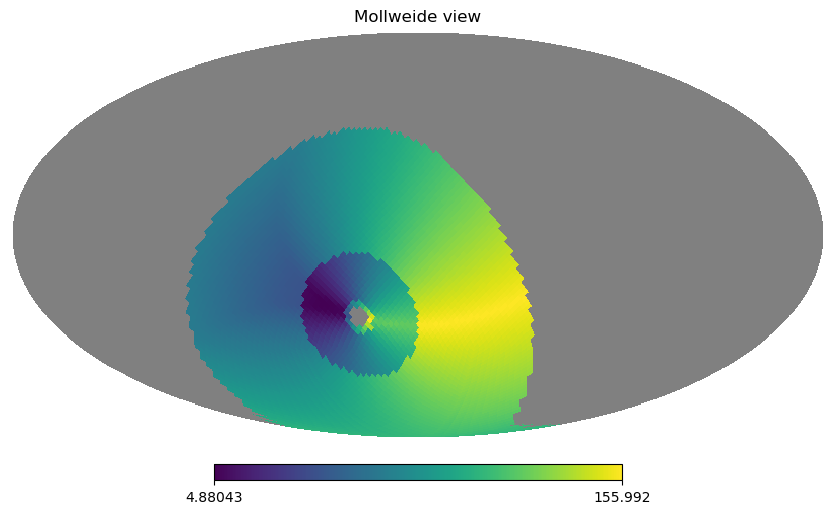

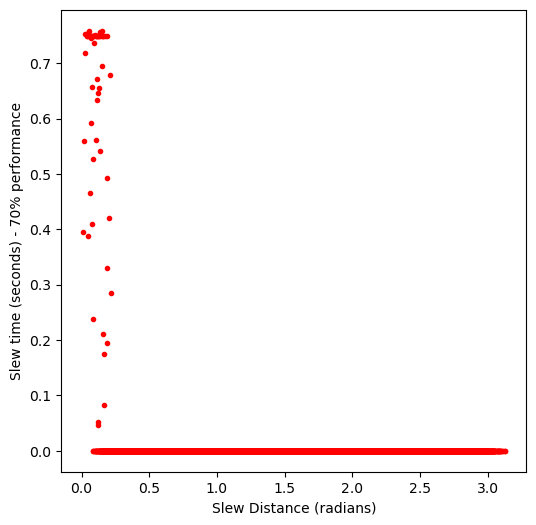

In [5]:
kinematic_model = KinemModel(mjd0=SURVEY_START_MJD)
tma70 = tma_movement(70)
tma40 = tma_movement(40)
tma = {}
for a in ['azimuth', 'altitude']:
    for k in ['accel', 'jerk']:
        key = f"{a}_{k}"
        tma[key] = tma40[key]
    for k in ['maxspeed']:
        key = f"{a}_{k}"
        tma[key] = tma70[key]
tma['settle_time'] = tma40['settle_time']
kinematic_model.setup_telescope(**tma)

slewtimes = kinematic_model.slew_times(np.radians(sky['ra']), np.radians(sky['dec']), mjd=SURVEY_START_MJD,
                                      starting_alt_rad=starting_alt_rad, starting_az_rad=starting_az_rad)
hp.mollview(slewtimes, rot=(120, 0, 0))

plt.figure(figsize=(6,6))
#plt.plot(dists, slewtimes, 'k.')
plt.plot(dists, slewtimes - nominal, 'r.')
plt.xlabel("Slew Distance (radians)")
plt.ylabel("Slew time (seconds) - 70% performance")

Text(0, 0.5, 'Slew time (seconds) - 70% performance')

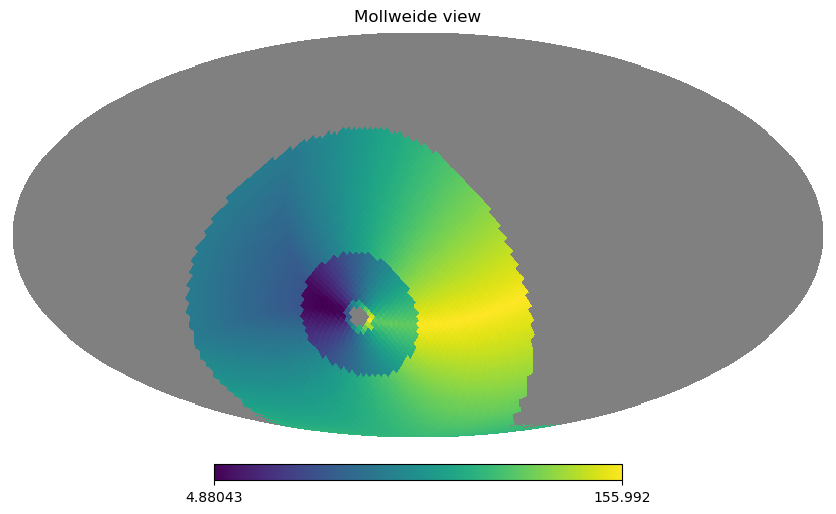

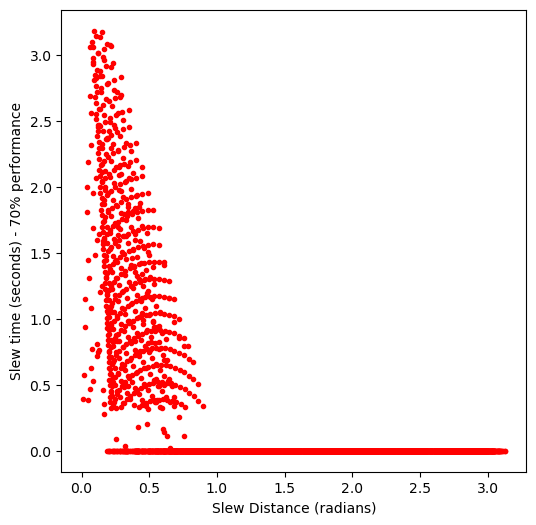

In [6]:
kinematic_model = KinemModel(mjd0=SURVEY_START_MJD)
tma = tma_movement(40)
kinematic_model.setup_telescope(**tma)

slewtimes = kinematic_model.slew_times(np.radians(sky['ra']), np.radians(sky['dec']), mjd=SURVEY_START_MJD,
                                      starting_alt_rad=starting_alt_rad, starting_az_rad=starting_az_rad)
hp.mollview(slewtimes, rot=(120, 0, 0))

plt.figure(figsize=(6,6))
#plt.plot(dists, slewtimes, 'k.')
plt.plot(dists, slewtimes - nominal, 'r.')
plt.xlabel("Slew Distance (radians)")
plt.ylabel("Slew time (seconds) - 70% performance")

Text(0, 0.5, 'Slew time (seconds) - 70% performance')

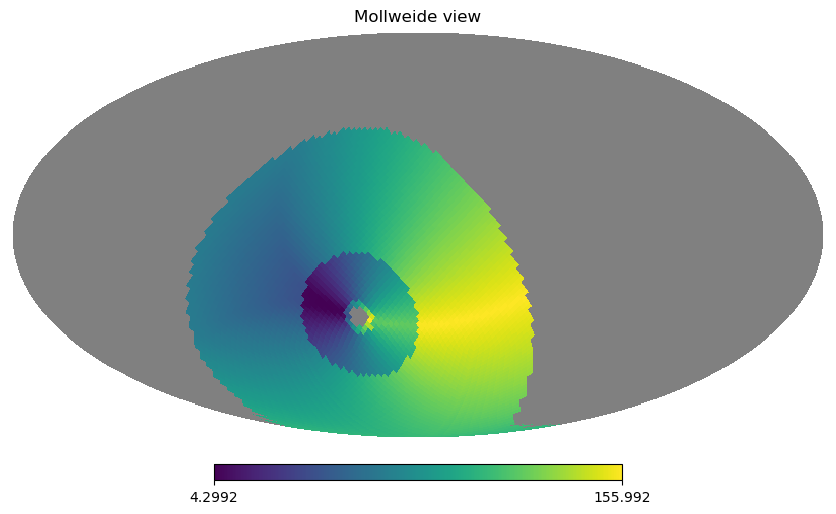

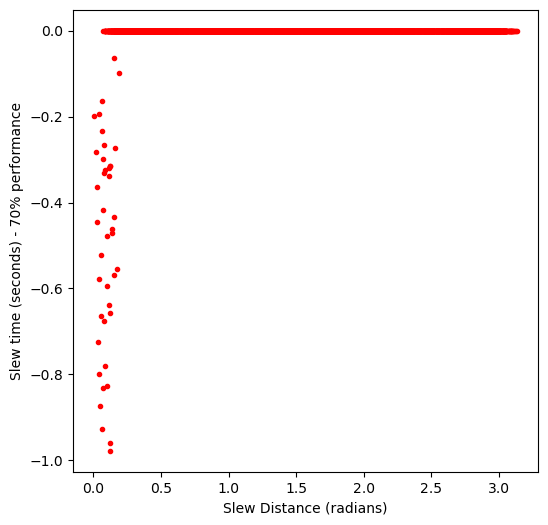

In [7]:
kinematic_model = KinemModel(mjd0=SURVEY_START_MJD)
tma = tma_movement(100)
kinematic_model.setup_telescope(**tma)

slewtimes = kinematic_model.slew_times(np.radians(sky['ra']), np.radians(sky['dec']), mjd=SURVEY_START_MJD,
                                      starting_alt_rad=starting_alt_rad, starting_az_rad=starting_az_rad)
hp.mollview(slewtimes, rot=(120, 0, 0))

plt.figure(figsize=(6,6))
#plt.plot(dists, slewtimes, 'k.')
plt.plot(dists, slewtimes - nominal, 'r.')
plt.xlabel("Slew Distance (radians)")
plt.ylabel("Slew time (seconds) - 70% performance")